# **Premier League Result Prediction with Random Forest**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Load Dataset**

In [2]:
df = pd.read_csv('final_dataset.csv')
df

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,AHTGS,AATGS,AHTGC,AATGC,...,AwayTeamLP,MW,DiffLP,HTGD,ATGD,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,DiffFormPts
0,0,Arsenal,Crystal Palace,2.0,1.0,H,0.0,0.0,0.0,0.0,...,10.0,1.0,-7.0,0.0000,0.0000,MMM,MMM,0,0,0.0000
1,1,Leicester,Everton,2.0,2.0,D,0.0,0.0,0.0,0.0,...,11.0,1.0,3.0,0.0000,0.0000,MMM,MMM,0,0,0.0000
2,2,Man United,Swansea,1.0,2.0,A,0.0,0.0,0.0,0.0,...,8.0,1.0,-4.0,0.0000,0.0000,MMM,MMM,0,0,0.0000
3,3,QPR,Hull,0.0,1.0,A,0.0,0.0,0.0,0.0,...,18.0,1.0,2.0,0.0000,0.0000,MMM,MMM,0,0,0.0000
4,4,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,0.0,0.0,...,17.0,1.0,-8.0,0.0000,0.0000,MMM,MMM,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,3575,Aston Villa,Arsenal,1.0,0.0,H,34.0,33.0,20.0,14.0,...,2.0,16.0,1.0,0.8750,1.1875,WDW,WWW,7,9,-0.1250
3576,3576,Everton,Chelsea,2.0,0.0,H,18.0,26.0,20.0,24.0,...,12.0,16.0,3.0,-0.1250,0.1250,WWL,LWL,6,3,0.1875
3577,3577,Fulham,West Ham,5.0,0.0,H,21.0,26.0,26.0,25.0,...,9.0,16.0,1.0,-0.3125,0.0625,WLW,WDW,6,7,-0.0625
3578,3578,Luton,Man City,1.0,2.0,A,16.0,36.0,30.0,17.0,...,4.0,16.0,14.0,-0.8750,1.1875,LLW,LDD,3,2,0.0625


## Preparation data

**Remove first 3 matchweeks**

In [3]:
# Remove first 3 matchweeks
df = df[df.MW > 3]
df

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,AHTGS,AATGS,AHTGC,AATGC,...,AwayTeamLP,MW,DiffLP,HTGD,ATGD,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,DiffFormPts
30,30,Arsenal,Man City,2.0,2.0,D,5.0,5.0,4.0,2.0,...,2.0,4.0,1.0,0.2500,0.7500,DDW,LWW,5,6,-0.2500
31,31,Chelsea,Swansea,4.0,2.0,H,11.0,6.0,4.0,1.0,...,8.0,4.0,-7.0,1.7500,1.2500,WWW,WWW,9,9,0.0000
32,32,Crystal Palace,Burnley,0.0,0.0,D,5.0,1.0,8.0,4.0,...,19.0,4.0,-9.0,-0.7500,-0.7500,DLL,DLL,1,1,0.0000
33,33,Liverpool,Aston Villa,0.0,1.0,A,6.0,3.0,4.0,1.0,...,17.0,4.0,-11.0,0.5000,0.5000,WLW,WDW,6,7,-0.2500
34,34,Southampton,Newcastle,4.0,0.0,H,4.0,3.0,3.0,5.0,...,15.0,4.0,-8.0,0.2500,-0.5000,WDL,DDL,4,2,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,3575,Aston Villa,Arsenal,1.0,0.0,H,34.0,33.0,20.0,14.0,...,2.0,16.0,1.0,0.8750,1.1875,WDW,WWW,7,9,-0.1250
3576,3576,Everton,Chelsea,2.0,0.0,H,18.0,26.0,20.0,24.0,...,12.0,16.0,3.0,-0.1250,0.1250,WWL,LWL,6,3,0.1875
3577,3577,Fulham,West Ham,5.0,0.0,H,21.0,26.0,26.0,25.0,...,9.0,16.0,1.0,-0.3125,0.0625,WLW,WDW,6,7,-0.0625
3578,3578,Luton,Man City,1.0,2.0,A,16.0,36.0,30.0,17.0,...,4.0,16.0,14.0,-0.8750,1.1875,LLW,LDD,3,2,0.0625


**Select fretures**

In [4]:
dataset = df[['FTR', 'HTGD','ATGD','HTP','ATP','HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3','DiffFormPts','DiffLP']]
dataset

,FTR,HTGD,ATGD,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,DiffFormPts,DiffLP
30,D,0.2500,0.7500,1.2500,1.5000,D,D,W,L,W,W,-0.2500,1.0
31,H,1.7500,1.2500,2.2500,2.2500,W,W,W,W,W,W,0.0000,-7.0
32,D,-0.7500,-0.7500,0.2500,0.2500,D,L,L,D,L,L,0.0000,-9.0
33,A,0.5000,0.5000,1.5000,1.7500,W,L,W,W,D,W,-0.2500,-11.0
34,H,0.2500,-0.5000,1.0000,0.5000,W,D,L,D,D,L,0.5000,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,H,0.8750,1.1875,2.0000,2.2500,W,D,W,W,W,W,-0.1250,1.0
3576,H,-0.1250,0.1250,1.2500,1.1875,W,W,L,L,W,L,0.1875,3.0
3577,H,-0.3125,0.0625,1.1250,1.5000,W,L,W,W,D,W,-0.0625,1.0
3578,A,-0.8750,1.1875,0.5625,1.8750,L,L,W,L,D,D,0.0625,14.0


**Plotting Feature Relationships**

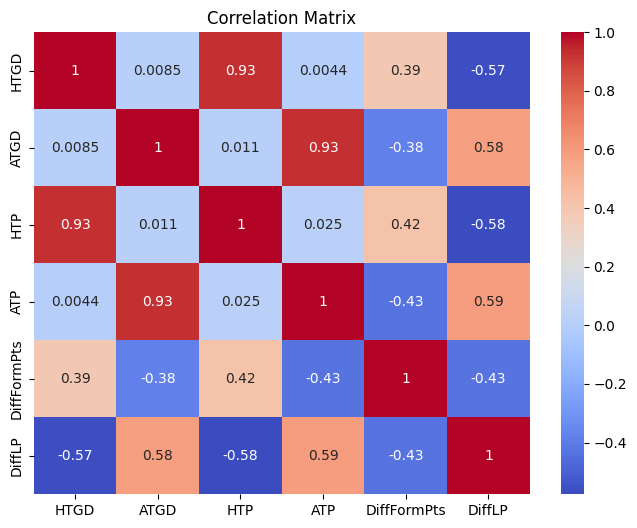

In [5]:
# plot coorelation matrix of numberic columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])
correlation = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Split dataset into training and label**

In [6]:
# split dataset into training and label
X = dataset.drop(columns=['FTR'])
y = dataset['FTR'].values
X

,HTGD,ATGD,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,DiffFormPts,DiffLP
30,0.2500,0.7500,1.2500,1.5000,D,D,W,L,W,W,-0.2500,1.0
31,1.7500,1.2500,2.2500,2.2500,W,W,W,W,W,W,0.0000,-7.0
32,-0.7500,-0.7500,0.2500,0.2500,D,L,L,D,L,L,0.0000,-9.0
33,0.5000,0.5000,1.5000,1.7500,W,L,W,W,D,W,-0.2500,-11.0
34,0.2500,-0.5000,1.0000,0.5000,W,D,L,D,D,L,0.5000,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,0.8750,1.1875,2.0000,2.2500,W,D,W,W,W,W,-0.1250,1.0
3576,-0.1250,0.1250,1.2500,1.1875,W,W,L,L,W,L,0.1875,3.0
3577,-0.3125,0.0625,1.1250,1.5000,W,L,W,W,D,W,-0.0625,1.0
3578,-0.8750,1.1875,0.5625,1.8750,L,L,W,L,D,D,0.0625,14.0


In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 2, 1, ..., 2, 0, 2])

**One hot encoding non-numeric columns**

In [8]:
# one hot encoding for the non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object'])
X = pd.get_dummies(X, columns=non_numeric_columns.columns)
X

,HTGD,ATGD,HTP,ATP,DiffFormPts,DiffLP,HM1_D,HM1_L,HM1_W,HM2_D,...,HM3_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W
30,0.2500,0.7500,1.2500,1.5000,-0.2500,1.0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
31,1.7500,1.2500,2.2500,2.2500,0.0000,-7.0,False,False,True,False,...,True,False,False,True,False,False,True,False,False,True
32,-0.7500,-0.7500,0.2500,0.2500,0.0000,-9.0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
33,0.5000,0.5000,1.5000,1.7500,-0.2500,-11.0,False,False,True,False,...,True,False,False,True,True,False,False,False,False,True
34,0.2500,-0.5000,1.0000,0.5000,0.5000,-8.0,False,False,True,True,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,0.8750,1.1875,2.0000,2.2500,-0.1250,1.0,False,False,True,True,...,True,False,False,True,False,False,True,False,False,True
3576,-0.1250,0.1250,1.2500,1.1875,0.1875,3.0,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
3577,-0.3125,0.0625,1.1250,1.5000,-0.0625,1.0,False,False,True,False,...,True,False,False,True,True,False,False,False,False,True
3578,-0.8750,1.1875,0.5625,1.8750,0.0625,14.0,False,True,False,False,...,True,False,True,False,True,False,False,True,False,False


**Split training and testing data**   

1 seasons = 350 row (380 - first 3 match week=30) 
* training data = 7 seasons = 350*7 =2450 row
* tesing data = 3 seasons = 350*2 + (160-30) = 830 row

In [9]:
# split dataset into training and testing
X_train = X[:2450]
y_train = y[:2450]
X_test = X[2450:]
y_test = y[2450:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2450, 24), (2450,), (830, 24), (830,))

In [10]:
X_train

,HTGD,ATGD,HTP,ATP,DiffFormPts,DiffLP,HM1_D,HM1_L,HM1_W,HM2_D,...,HM3_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W
30,0.250000,0.750000,1.250000,1.500000,-0.250000,1.0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
31,1.750000,1.250000,2.250000,2.250000,0.000000,-7.0,False,False,True,False,...,True,False,False,True,False,False,True,False,False,True
32,-0.750000,-0.750000,0.250000,0.250000,0.000000,-9.0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
33,0.500000,0.500000,1.500000,1.750000,-0.250000,-11.0,False,False,True,False,...,True,False,False,True,True,False,False,False,False,True
34,0.250000,-0.500000,1.000000,0.500000,0.500000,-8.0,False,False,True,True,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,0.631579,-0.605263,1.736842,1.157895,0.157895,-11.0,False,False,True,False,...,True,False,True,False,False,False,True,False,True,False
2656,1.210526,0.105263,2.184211,1.552632,-0.026316,-9.0,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
2657,-1.157895,-0.552632,0.526316,1.026316,0.000000,3.0,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True
2658,0.315789,-0.473684,1.631579,1.131579,-0.052632,-9.0,False,False,True,True,...,False,False,True,False,False,False,True,False,False,True


**Standardizing numeric data without one hot encoded**

In [11]:
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_train.loc[:, numeric_columns.columns] = scaler.fit_transform(X_train[numeric_columns.columns])
X_test.loc[:, numeric_columns.columns] = scaler.transform(X_test[numeric_columns.columns])

In [12]:
X_train

,HTGD,ATGD,HTP,ATP,DiffFormPts,DiffLP,HM1_D,HM1_L,HM1_W,HM2_D,...,HM3_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W
30,0.343816,0.990636,-0.054033,0.418470,-0.834316,0.122606,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
31,2.345249,1.658502,1.923475,1.896696,0.035129,-0.831374,False,False,True,False,...,True,False,False,True,False,False,True,False,False,True
32,-0.990473,-1.012962,-2.031542,-2.045242,0.035129,-1.069869,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
33,0.677388,0.656703,0.440344,0.911212,-0.834316,-1.308364,False,False,True,False,...,True,False,False,True,True,False,False,False,False,True
34,0.343816,-0.679029,-0.548410,-1.552499,1.774019,-0.950621,False,False,True,True,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,0.852952,-0.819633,0.908701,-0.255809,0.584252,-1.308364,False,False,True,False,...,True,False,True,False,False,False,True,False,True,False
2656,1.625435,0.129440,1.793376,0.522205,-0.056391,-1.069869,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
2657,-1.534723,-0.749331,-1.485125,-0.515147,0.035129,0.361101,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True
2658,0.431598,-0.643878,0.700543,-0.307677,-0.147912,-1.069869,False,False,True,True,...,False,False,True,False,False,False,True,False,False,True


In [13]:
# create model and hyperparameter tuning
clf = RandomForestClassifier()

# grid search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'best parameters: {grid_search.best_params_}')
print(f'best score: {grid_search.best_score_}')

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2

**Train best model**

In [21]:
rf = RandomForestClassifier(**grid_search.best_params_)
rf.fit(X_train, y_train)

accuracy: 0.5674698795180723
classification report: 
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       264
           1       0.16      0.02      0.04       184
           2       0.60      0.82      0.69       382

    accuracy                           0.57       830
   macro avg       0.43      0.48      0.43       830
weighted avg       0.48      0.57      0.51       830



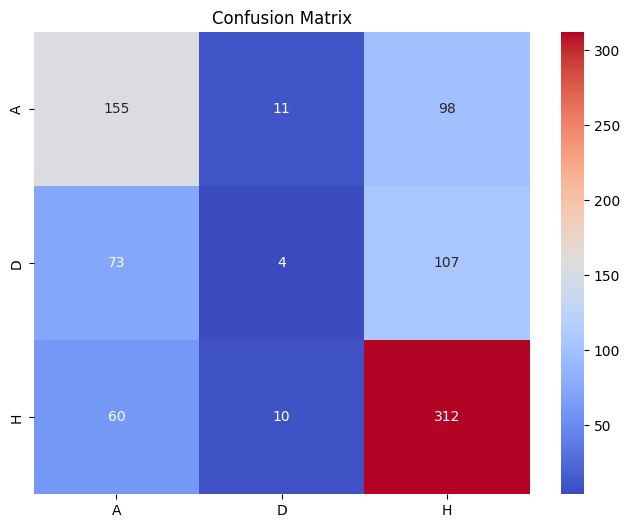

In [18]:
y_pred = rf.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'classification report: \n{classification_report(y_test, y_pred)}')

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.show()